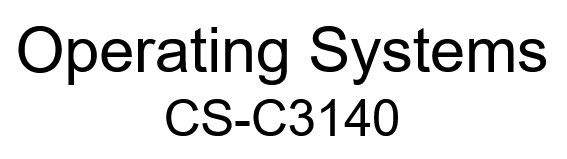

In [ ]:
! echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [ ]:
! which ls

/bin/ls


#Assignment 5: System Calls

**Note**: The following exercises can be solved in a number of ways:
* Using this Google Colab notebook (please save your own copy and work on that, instructions below)
* Compiling the C source code on your own machine
* **If you are familiar with Linux:**
* Over an SSH connection to [Aalto shell servers](https://www.aalto.fi/en/services/linux-shell-servers-at-aalto)

Please feel free to use the option that works best for you. Please enter the results in the [A+ platform](https://plus.cs.aalto.fi/accounts/login/?next=/os/2022/). For any questions please refer to the [Zulip chat of the OS course](https://operatingsystems.zulip.aalto.fi/).

**When compiling the code below, before making any of your edits, for gcc versions less than 9.5.0, you may see compilation warnings which you can safely ignore. It is not safe to ignore any other compilation warnings and compilation errors introduced by code added or edited by you.**

The UNIX system provides several system calls to create and end program, to send and receive software interrupts, to allocate memory, and to do other useful jobs for a process. 

## Process System Calls

The following system calls are provided for creating a process, ending a process, and  waiting for a process to complete. These are `fork()`, the `exec` family, `wait()`, and `exit()`.
 
Write a simple command interpreter that executes commands typed in by the user.  The commands are expected to accept parameters. For example, both `ls` and `ls -l`.

In the template below, replace each `TODO` line with the correct line of code. For solving this assignment, use the following system calls:
* [fork](https://linux.die.net/man/2/fork)
* [exec*](https://linux.die.net/man/3/exec)
* [wait](https://linux.die.net/man/2/wait)


**Note**: For the purpose of this exercise you can safely ignore the warnings about `gets()`.

In [ ]:
! man wait(3)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: ` man wait(3)'


In [ ]:
%%writefile myshell.c

#include <stdio.h>
#include <stdlib.h>
#include <unistd.h>
#include <sys/wait.h>

int main()
{
  int process;

  int BUFFER_SIZE = 256;
  char line[BUFFER_SIZE];
  char* args[BUFFER_SIZE];

  for (;;)
  {
    fprintf(stderr, "cmd: ");
    
    /* blank line input */
    if ( gets (line) == (char *) NULL)
        exit (0);

    /* create a new process */
    process = fork ();
    
    if (process > 0)
    {
      /* parent */
      //TODO-1: the parent is waiting on the child thread
      long todo_1 = ;
      wait ((int *) todo_1);
    }
    else if (process == 0)
    {
      /* child - execute program */
      printf("executing %s \n", line);

      int args_i = 0;
      args[0] = line;
      args_i++;
      int after = 0;
      
      // TODO-2: The system call requires a list of parameters.
      // The string that has been input needs to be parsed into tokens.
      // It is sufficient to store the pointers to start of the tokens.
      // Determine the character required to replace the space character from
      // the read line. Assume that there is a single white space separating
      // the args.

      char todo_2 = ;
      while(after < BUFFER_SIZE && *(line + after) != '\0')
      {
        printf("%c\n", *(line + after));
        if(*(line + after) == ' ')
        {
          *(line + after) = todo_2;
          args[args_i] = line + after + 1;
          args_i++;
        }
        after++;
      }

      //TODO-3: Fill the args array according to the man page of the system call
      long todo_3 = ;
      args[args_i] = (void *) todo_3;

      //TODO-4: Execvp takes two paramters. Considering the array in args,
      // set the parameters accordingly.
      char* todo_4_1 = ;
      char** todo_4_2 = ;
      execvp(todo_4_1, todo_4_2);

      /* some problem if the execution returns */                              
      fprintf (stderr, "Can't execute %s\n", line);
      exit (1);
    }
    else if ( process == -1)
    {
      /* can't create a new process */
      fprintf (stderr, "Can't fork!\n");
      exit (2);
    }
  }
}

Overwriting myshell.c


In [ ]:
# Compiling the easoshell
!gcc -Wall -o myshell myshell.c

In [ ]:
!./myshell

## File System Calls



The UNIX system file system treats an ordinary file as a sequence of bytes.  No internal structure is imposed on a file by the operating system.  Generally, a file is read or written sequentially -- that is, from beginning to the end of the file.

Write a program that [opens](https://linux.die.net/man/2/open) a file called datafile.dat (assume that it is not already existing, and throw error otherwise) for writing, writes the contents of `message` to the file, [rewinds](https://linux.die.net/man/2/lseek) the file pointer to the beginning of the file, [reads](https://linux.die.net/man/2/read) the message again and finally [closes](https://linux.die.net/man/2/close) the file.

In the template below, replace each `TODO` line with the correct line of code.

In [ ]:
%%writefile filesystem.c

#include <stdio.h>
#include <stdlib.h>
#include <unistd.h>
#include <fcntl.h>         /* defines options flags */
#include <sys/types.h>     /* defines types used by sys/stat.h */
#include <sys/stat.h>      /* defines S_IREAD & S_IWRITE  */

static char message[] = "Hello, world";

int main()
{
  int fd;
  char buffer[80];
  int nrr;

  /* open datafile.dat for read/write access   (O_RDWR)
      create datafile.dat if it does not exist  (O_CREAT)
      return error if datafile already exists   (O_EXCL)
      permit read/write access to file  (S_IWRITE | S_IREAD)
  */
 
  //open datafile.dat for writing and update the file descriptor fd
  //TODO-1 the necessary flags are
  int todo_1 = ;
  fd = open("datafile.dat", todo_1, S_IREAD | S_IWRITE);

  if (fd != -1)
  {
      printf("datafile.dat opened for read/write access\n");
      
      //Write the contents
      //TODO-2: What is the value needed for todo_2?
      int todo_2 = ;
      write(fd, message, todo_2);
      
      //Rewind the file pointer
      //TODO-3: What is the value needed for todo_3
      int todo_3 = ;
      lseek(fd, todo_3, 0);

      //TODO-4: Read the file contents
      int todo_4 =  ;
      nrr = read(fd, buffer, todo_4);

      if (nrr == sizeof(message))
        printf("\"%s\" was written to datafile.dat\n", buffer);
      else
        printf("*** error reading datafile.dat ***\n");
   
      close (fd);
  }
  else
      printf("*** datafile.dat already exists ***\n");
 
  exit (0);
}


In [ ]:
# Compiling the filesystem
!gcc -Wall -o filesystem filesystem.c

In [ ]:
!./filesystem